In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import scipy
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Set the style
sns.set_style("white")

In [2]:
# Create dataframe and keep only the columns we need. Rename the columns
df_raw = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv',
                        header=4, # Sets the header
                        skipfooter = 3,
                        warn_bad_lines = True,
                        skip_blank_lines = True,
                        engine='python')
df = df_raw.copy()
df = df.set_index('City')
df.drop(columns=['Rape\n(revised\ndefinition)1', 'Arson3'], inplace=True)
df.columns = ['Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery', 'Aggrav_assault', 'Property_crime', 
              'Burglary', 'Larceny', 'Vehicle_theft']
df.head()

,Population,Violent_crime,Murder,Rape,Robbery,Aggrav_assault,Property_crime,Burglary,Larceny,Vehicle_theft
City,,,,,,,,,,
Adams Village,"1,861",0,0,0,0,0,12,2,10,0
Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1
Akron Village,"2,846",3,0,0,0,3,16,1,15,0
Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142
Albion Village,"6,388",23,0,3,4,16,223,53,165,5


We know from the previous assignment that there are several outliers in robbery and murder, as well as NYC, which was a gigantic outlier in terms of population. But since we want to make a regression model that accounts for a lot of variance, let's see what happens when we leave it in.

However, because we are leaving it in, we need to do some sort of manipulation so that NYC doesn't overshadow everything else. To do so, let's divide the crimes by the city population to get a better baseline look.

In [3]:
# Format columns and divide by population
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Violent_crime'] = df['Violent_crime'].astype(str)
df['Murder'] = df['Murder'].astype(str)
df['Robbery'] = df['Robbery'].astype(str)

for column in list(df)[1:]:
    df[column] = df[column].str.replace(',', '').astype(float)
    df[column] = df.loc[:,column] / df.Population

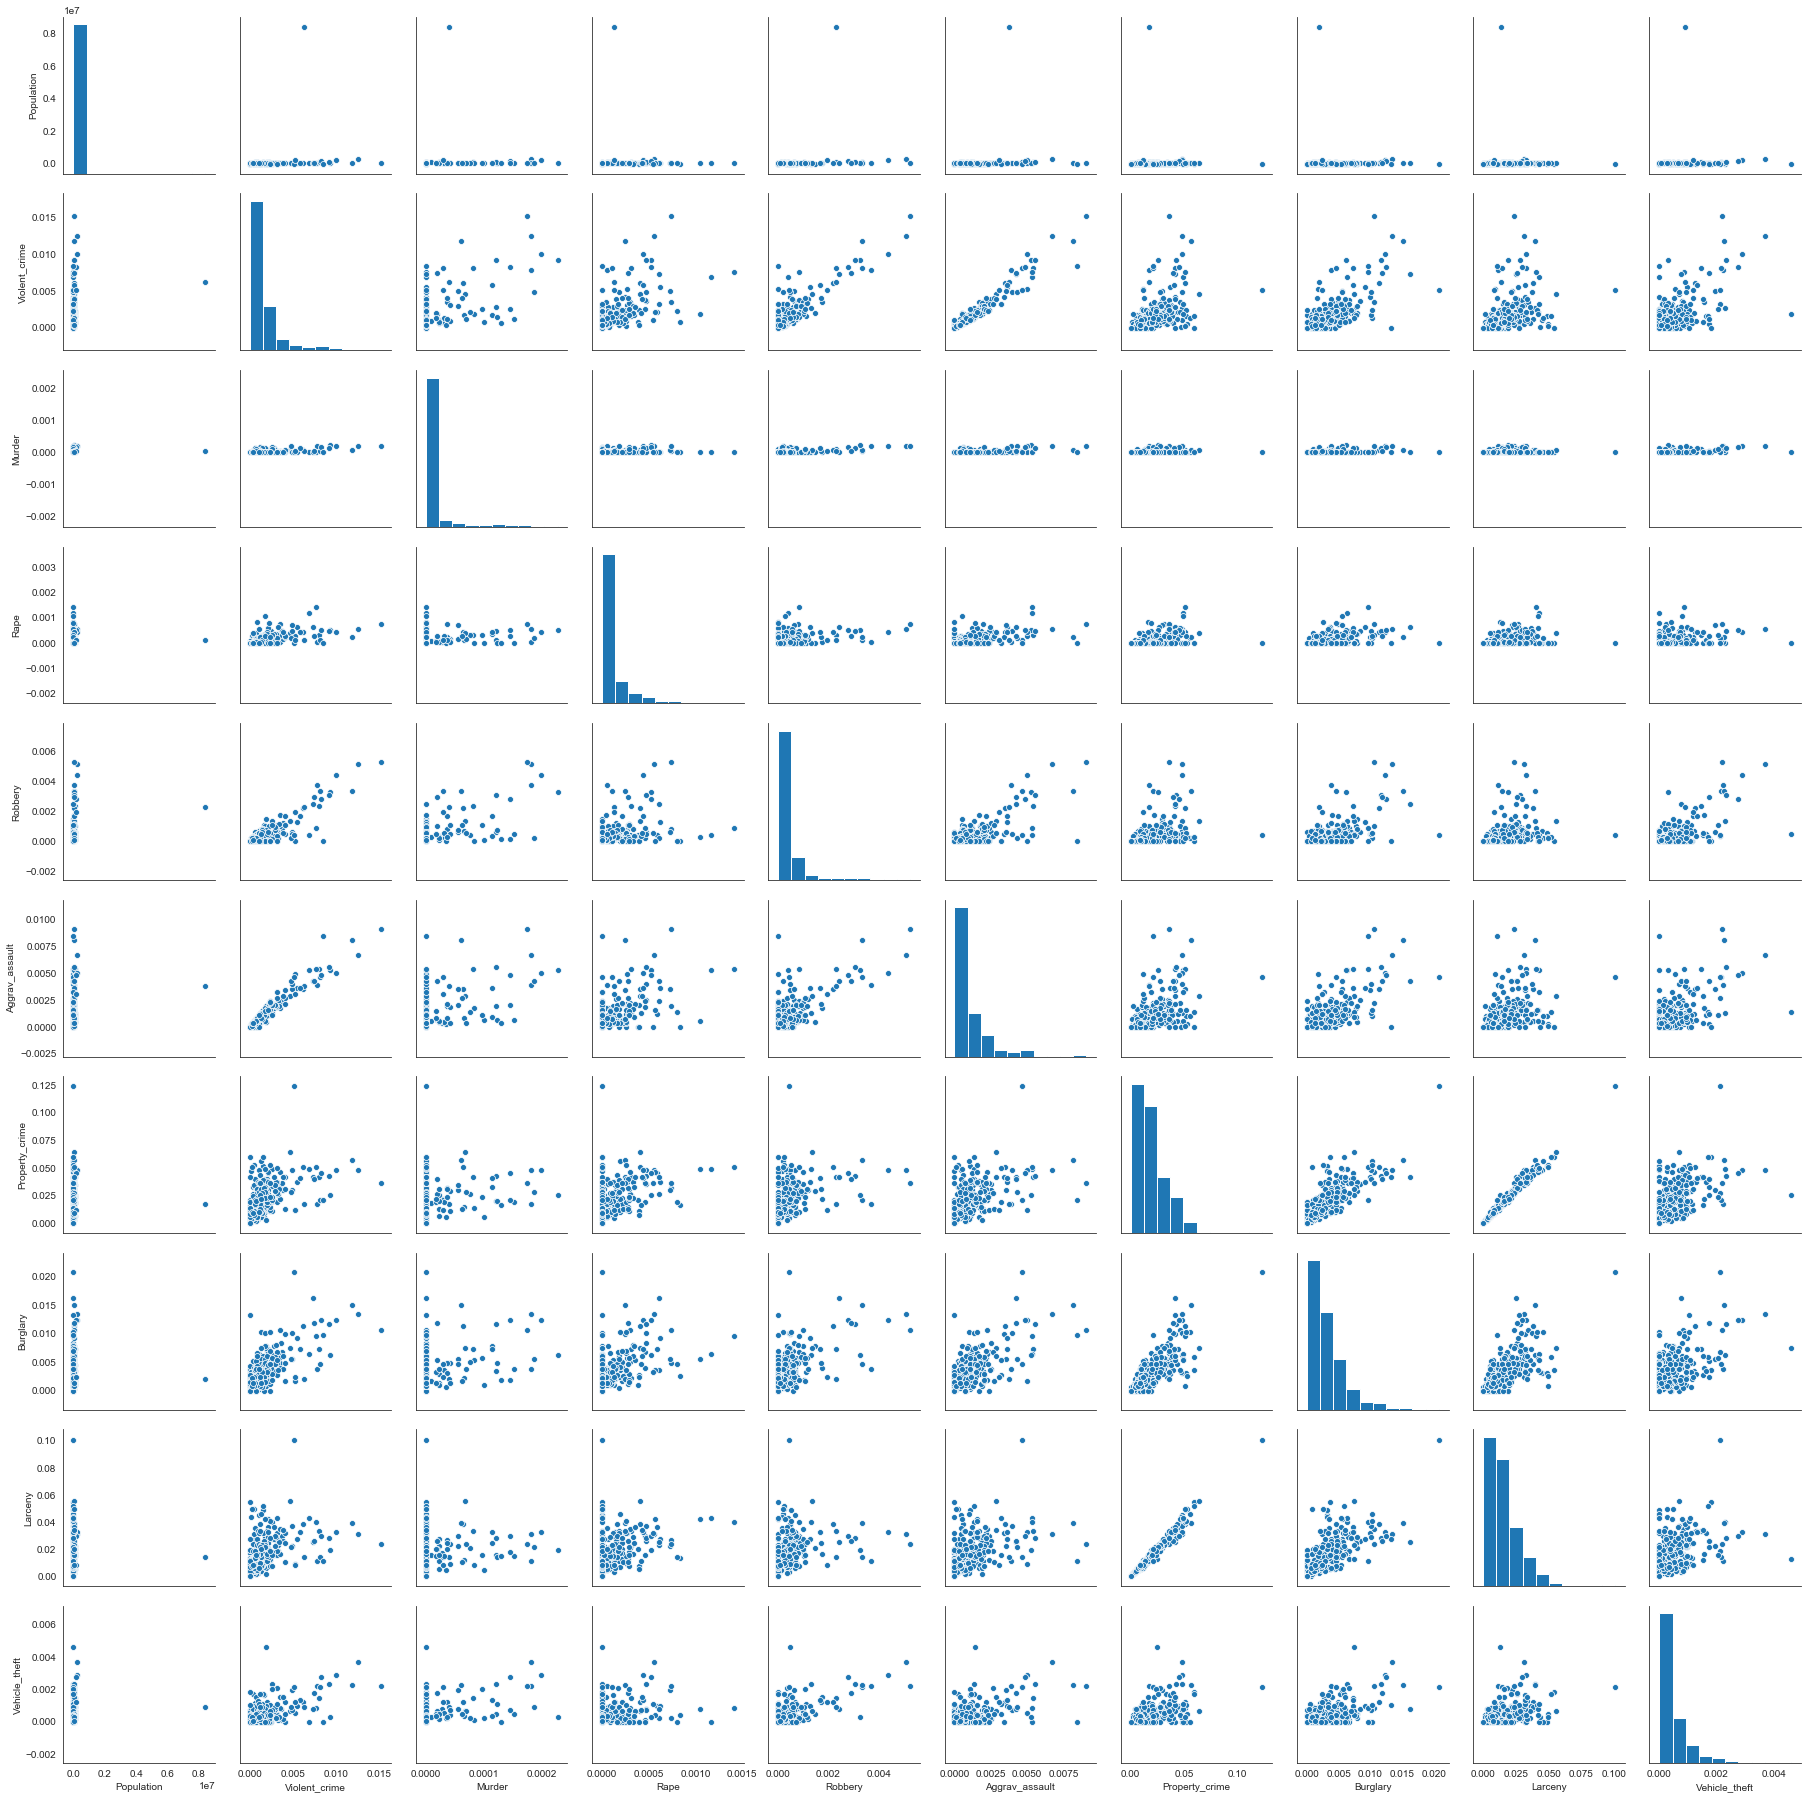

In [4]:
# Represent bivariate relationships 
sns.pairplot(df)
plt.show()

This data actually looks pretty ok. Looking at property crime, it looks like larceny and burglary. Others show no correlation, like murder and rape.

We'll choose to work with larceny(L), vehicle theft(VT), and burglary(B).

$$ Property crime/Population = \alpha + \beta_1*(L/P) + \beta_2*(VT/P) + \beta_3*(B/P) $$

In [5]:
# Fit our model.
regr = linear_model.LinearRegression()
Y = df['Property_crime']
X = df[['Larceny','Vehicle_theft','Burglary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1. 1. 1.]

Intercept: 
 1.0408340855860843e-17

R-squared:
1.0
